# column details

Id-Unique client ID

age-Age of the client

job-type of job(categorical)

marital-marital status of the client(categorical)

education-Education level(categorical)

default-has credit in default

balance-average yearly balance in euros

housing- has housing loan

loan-has personal loan

contact-contact communication type

day-last contact day of the month

month-last contact month of the year

duration-last contact duration,in seconds

pdays-number of contacts performed before this campaign

campaign- number of contacts performed during this campaign

poutcome-outcome of the previous marketing campaign

output variable(desired target)
y-has the client subscribed a term deposit


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('new_db.csv')
df.head(10)

,Id,age,job,marital,education,credit_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,1007,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,1008,NaN,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,1009,58.0,retired,married,primary,no,NaN,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,1010,43.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
df.tail(10)

,Id,age,job,marital,education,credit_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45202,46203,34.0,admin.,single,secondary,no,557.0,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,46204,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,46205,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,46206,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,46211,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no
45211,46211,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2,188,11,other,no


checking total number of null values in each column 

In [4]:
df.isnull().sum()

Id                0
age               9
job               0
marital           0
education         0
credit_default    0
balance           3
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

Gives Information like column name, Non-Null Count and Data type of each column 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45212 entries, 0 to 45211
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              45212 non-null  int64  
 1   age             45203 non-null  float64
 2   job             45212 non-null  object 
 3   marital         45212 non-null  object 
 4   education       45212 non-null  object 
 5   credit_default  45212 non-null  object 
 6   balance         45209 non-null  float64
 7   housing         45212 non-null  object 
 8   loan            45212 non-null  object 
 9   contact         45212 non-null  object 
 10  day             45212 non-null  int64  
 11  month           45212 non-null  object 
 12  duration        45212 non-null  int64  
 13  campaign        45212 non-null  int64  
 14  pdays           45212 non-null  int64  
 15  previous        45212 non-null  int64  
 16  poutcome        45212 non-null  object 
 17  y               45212 non-null 

Gives total number of records and total number of columns in dataset

In [6]:
df.shape

(45212, 18)

remove all the rows with any NaN values
becouse dataset has 45211 records.

In [7]:
 df=df.dropna()

After removing records with null values check the total number of records and columns

In [8]:
df.shape

(45201, 18)

T0 check whether there are duplicate values

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45207    False
45208    False
45209    False
45210    False
45211     True
Length: 45201, dtype: bool

Remove the duplicate record. 
 keep only the first duplicated record

In [10]:
df=df.drop_duplicates(keep='first')
df.shape

(45200, 18)

In [11]:
df['age']=df['age'].astype('int')

<AxesSubplot:>

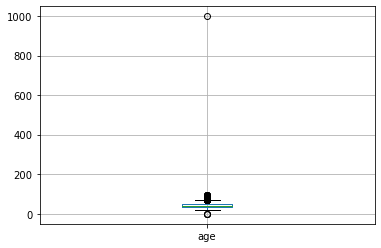

In [12]:
plot1=df.boxplot("age")
plot1

<AxesSubplot:>

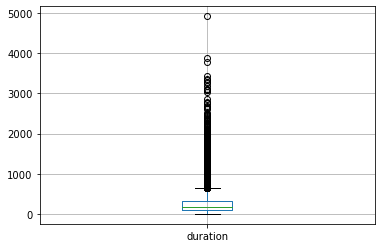

In [13]:
plot2=df.boxplot("duration")
plot2

Removing the records having age as 999 and -1. 

In [14]:
df.drop(0,axis=0,inplace=True)

In [15]:
df.drop(45203,axis=0,inplace=True)

In [16]:
df.drop(45204,axis=0,inplace=True)

In [17]:
df.drop(45205,axis=0,inplace=True)

In [19]:
df.shape

(45196, 18)

First 10 records of the dataset

In [20]:
df.head(10)

,Id,age,job,marital,education,credit_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,1002,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,1006,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,1007,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
10,1011,41,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no
11,1012,29,admin.,single,secondary,no,390.0,yes,no,unknown,5,may,137,1,-1,0,unknown,no
12,1013,53,technician,married,secondary,no,6.0,yes,no,unknown,5,may,517,1,-1,0,unknown,no
13,1014,58,technician,married,unknown,no,71.0,yes,no,unknown,5,may,71,1,-1,0,unknown,no


In [21]:
df.to_csv('cleaned_data.csv')